In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
x = 2
y = 2
nx = 21
my = 21
nt = 80

dx = x/(nx-1)
dy = y/(my-1)
sigma = .2
nu = 0.05
dt = sigma * dx

xarr = np.linspace(0,x,nx)
yarr = np.linspace(0,y,my)
print(xarr, yarr)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


In [3]:
def initialize():
    u = np.ones((nx,my))
    
    #Applying initial conditions
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    
    return u

initialize()

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
        1., 1., 1.,

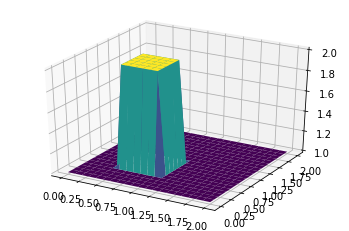

In [4]:
# Plotting the initial matrix

fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(xarr, yarr)

u = initialize()
ax.plot_surface(X, Y, u, cmap='viridis')
plt.show()

In [5]:
def diffuse(u, nt):
    
    for n in range(nt+1):
        un = u.copy()
#         for i in range(1,nx-1):
#             for j in range(1,my-1):
        u[1:-1, 1:-1] = un[1:-1,1:-1] + nu*dt/dx**2*(un[0:-2, 1:-1] - 2*un[1:-1, 1:-1] + un[2:, 1:-1]) + nu*dt/dy**2*(un[1:-1, 0:-2] - 2*un[1:-1, 1:-1] + un[1:-1, 2:])
#                 u[i,j] = un[i,j]*dt + nu*dt/dx**2*(un[i-1,j]-2*un[i,j]+un[i+1,j]) + nu*dt/dy**2*(un[i,j-1]-2*un[i,j]+un[i,j+1])
        u[0,:] = 1
        u[-1,:] = 1
        u[:,0] = 1
        u[:,-1] = 1
        
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, u, cmap='viridis')
    ax.set_zlim(1, 2.5)
        

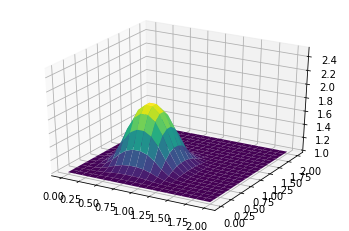

In [6]:
diffuse(u, 10)

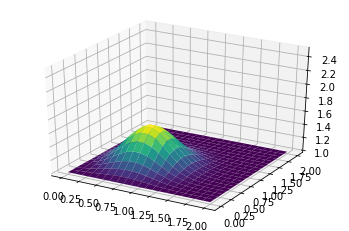

In [8]:
diffuse(u, 20)

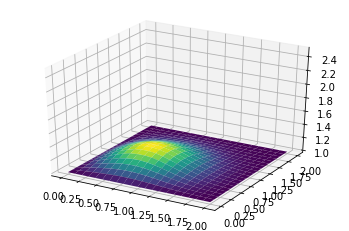

In [9]:
diffuse(u, 50)